

# Project: Investigate a Dataset - [Tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
 


### Question(s) for Analysis
1. what is the top 15 movies with the highest revenue over the years and identifying which movie has the highest revenue?
2. which genre is the popular over the years?
3. what is the most popular movies over the years?
4. what is the highest budgetted movies over the years?
5. which movie has the longest runtime and does the runtime affect revenue?

In [66]:
#import key libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling
I first loaded my dataset using pandas ,then I looked at the overview of the data. I got the number of entries/sample and columns of the dataset, then i got some key attributes of the data .After which I got the different datatypes in my data ,then I dropped data that wasn't relevant in my analysis.Finally i checked for null and duplicated entries in the data.

#### loading the datasaet

In [67]:
#loading the dataset using pandas
df_movies=pd.read_csv('tmdb-movies.csv')
df_movies.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


#### overview of the data

In [68]:
#checking the number of rows and columns
df_movies.shape

(10866, 21)

##### the dataset has a total of 10866 entries and under 21 different columns

In [69]:
#checking some key attributes of the data
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [70]:
#checking the datatypes in the dataset
df_movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

#### dropping data that is irrelevant to my analysis

In [71]:
#dropping columns that won't be used in the analysis
df_movies.drop(columns=['homepage','imdb_id','cast','revenue_adj','budget_adj','tagline'],axis=1,inplace=True)

In [72]:
#verifying data has been dropped 
df_movies.head(2)

,id,popularity,budget,revenue,original_title,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015


#### checking for empty rows and duplicates

In [73]:
#checking for empty rows
df_movies.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

#### dropping empty rows

In [74]:
df_movies.dropna(inplace=True)

In [75]:
#checking for empty rows
df_movies.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
director                0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

#### checking for duplicate rows in data

In [76]:
#checking for duplicates
sum(df_movies.duplicated())

1

#### dropping duplicates

In [77]:
#dropping duplicates
df_movies.drop_duplicates(inplace=True)
#checking for duplicates
sum(df_movies.duplicated())

0

##### Hence this shows thereare no empty rows nor duplicates in my data.So I don't need any further data cleaning process

#### visualizing the general distribution of the various attributes 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d848e3978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7d8471d710>]], dtype=object)

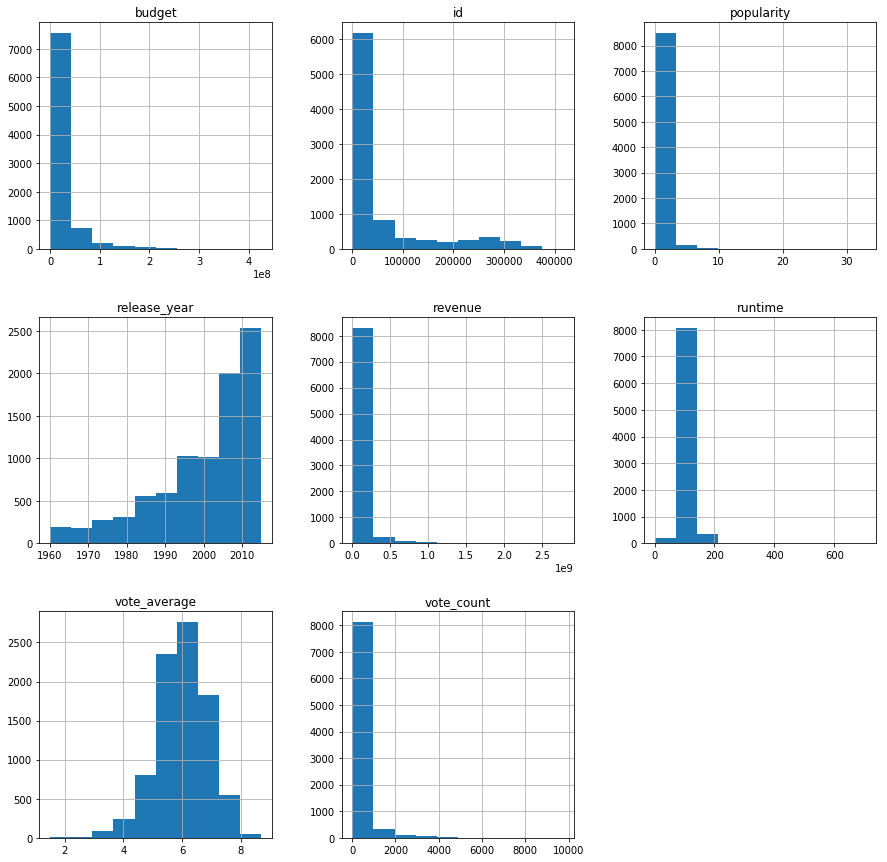

In [78]:
#plotting histograms 
df_movies.hist(figsize=(15,15))

##### with the exception of the vote_average and release_year ,most of the data is skewed toward the right

<a id='eda'></a>
## Exploratory Data Analysis(EDA)

In my EDA, I used various statitics and visualizations to bring forth insights from the data.These insights helped me answer the questions I stated initially in my introduction.


## Research Question 1 (what is the top 15 movies with the highest revenue over the years and identifying which movie has the highest revenue?)

In [79]:
# grouping the movies revenue according to their genre
df_revenue=df_movies.sort_values(by='revenue',ascending = False)
df_revenue[['original_title','genres','revenue']].head(15)

,original_title,genres,revenue
1386,Avatar,Action|Adventure|Fantasy|Science Fiction,2781505847
3,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,2068178225
5231,Titanic,Drama|Romance|Thriller,1845034188
4361,The Avengers,Science Fiction|Action|Adventure,1519557910
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,1513528810
4,Furious 7,Action|Crime|Thriller,1506249360
14,Avengers: Age of Ultron,Action|Adventure|Science Fiction,1405035767
3374,Harry Potter and the Deathly Hallows: Part 2,Adventure|Family|Fantasy,1327817822
5422,Frozen,Animation|Adventure|Family,1274219009
5425,Iron Man 3,Action|Adventure|Science Fiction,1215439994


##### This is the list of the top 15  movies with the highest revenues and the amount in US dollars of those revenues.

In [80]:
#creating a new query from the data to return movies with revenue more than or equals to 1billion
df_revenue1=df_movies.query('revenue>=1000000000')
df_revenue1.head(2)

,id,popularity,budget,revenue,original_title,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015


In [81]:
#creating a function for barplots
def barplot(df,x,y,figsize=(40,40)):
 '''Allows user to plot bar graph by specifying the dataframe,x and y.With this function I can always just provide my plot 
 parameters and eaily plot my bar graphs anytime I need to '''
 plt.figure(figsize=figsize)
 sns.barplot(data=df,x=x,y=y)
 #adding a title to the plot
 plt.title(f'plot of {y} against {x}'.title(),fontsize=40,weight='bold')
 #adding xlabel
 plt.xlabel(x.title(),fontsize=20,weight='bold')
 #adding ylabel
 plt.ylabel(y.title(),fontsize=20,weight='bold')
 plt.show()

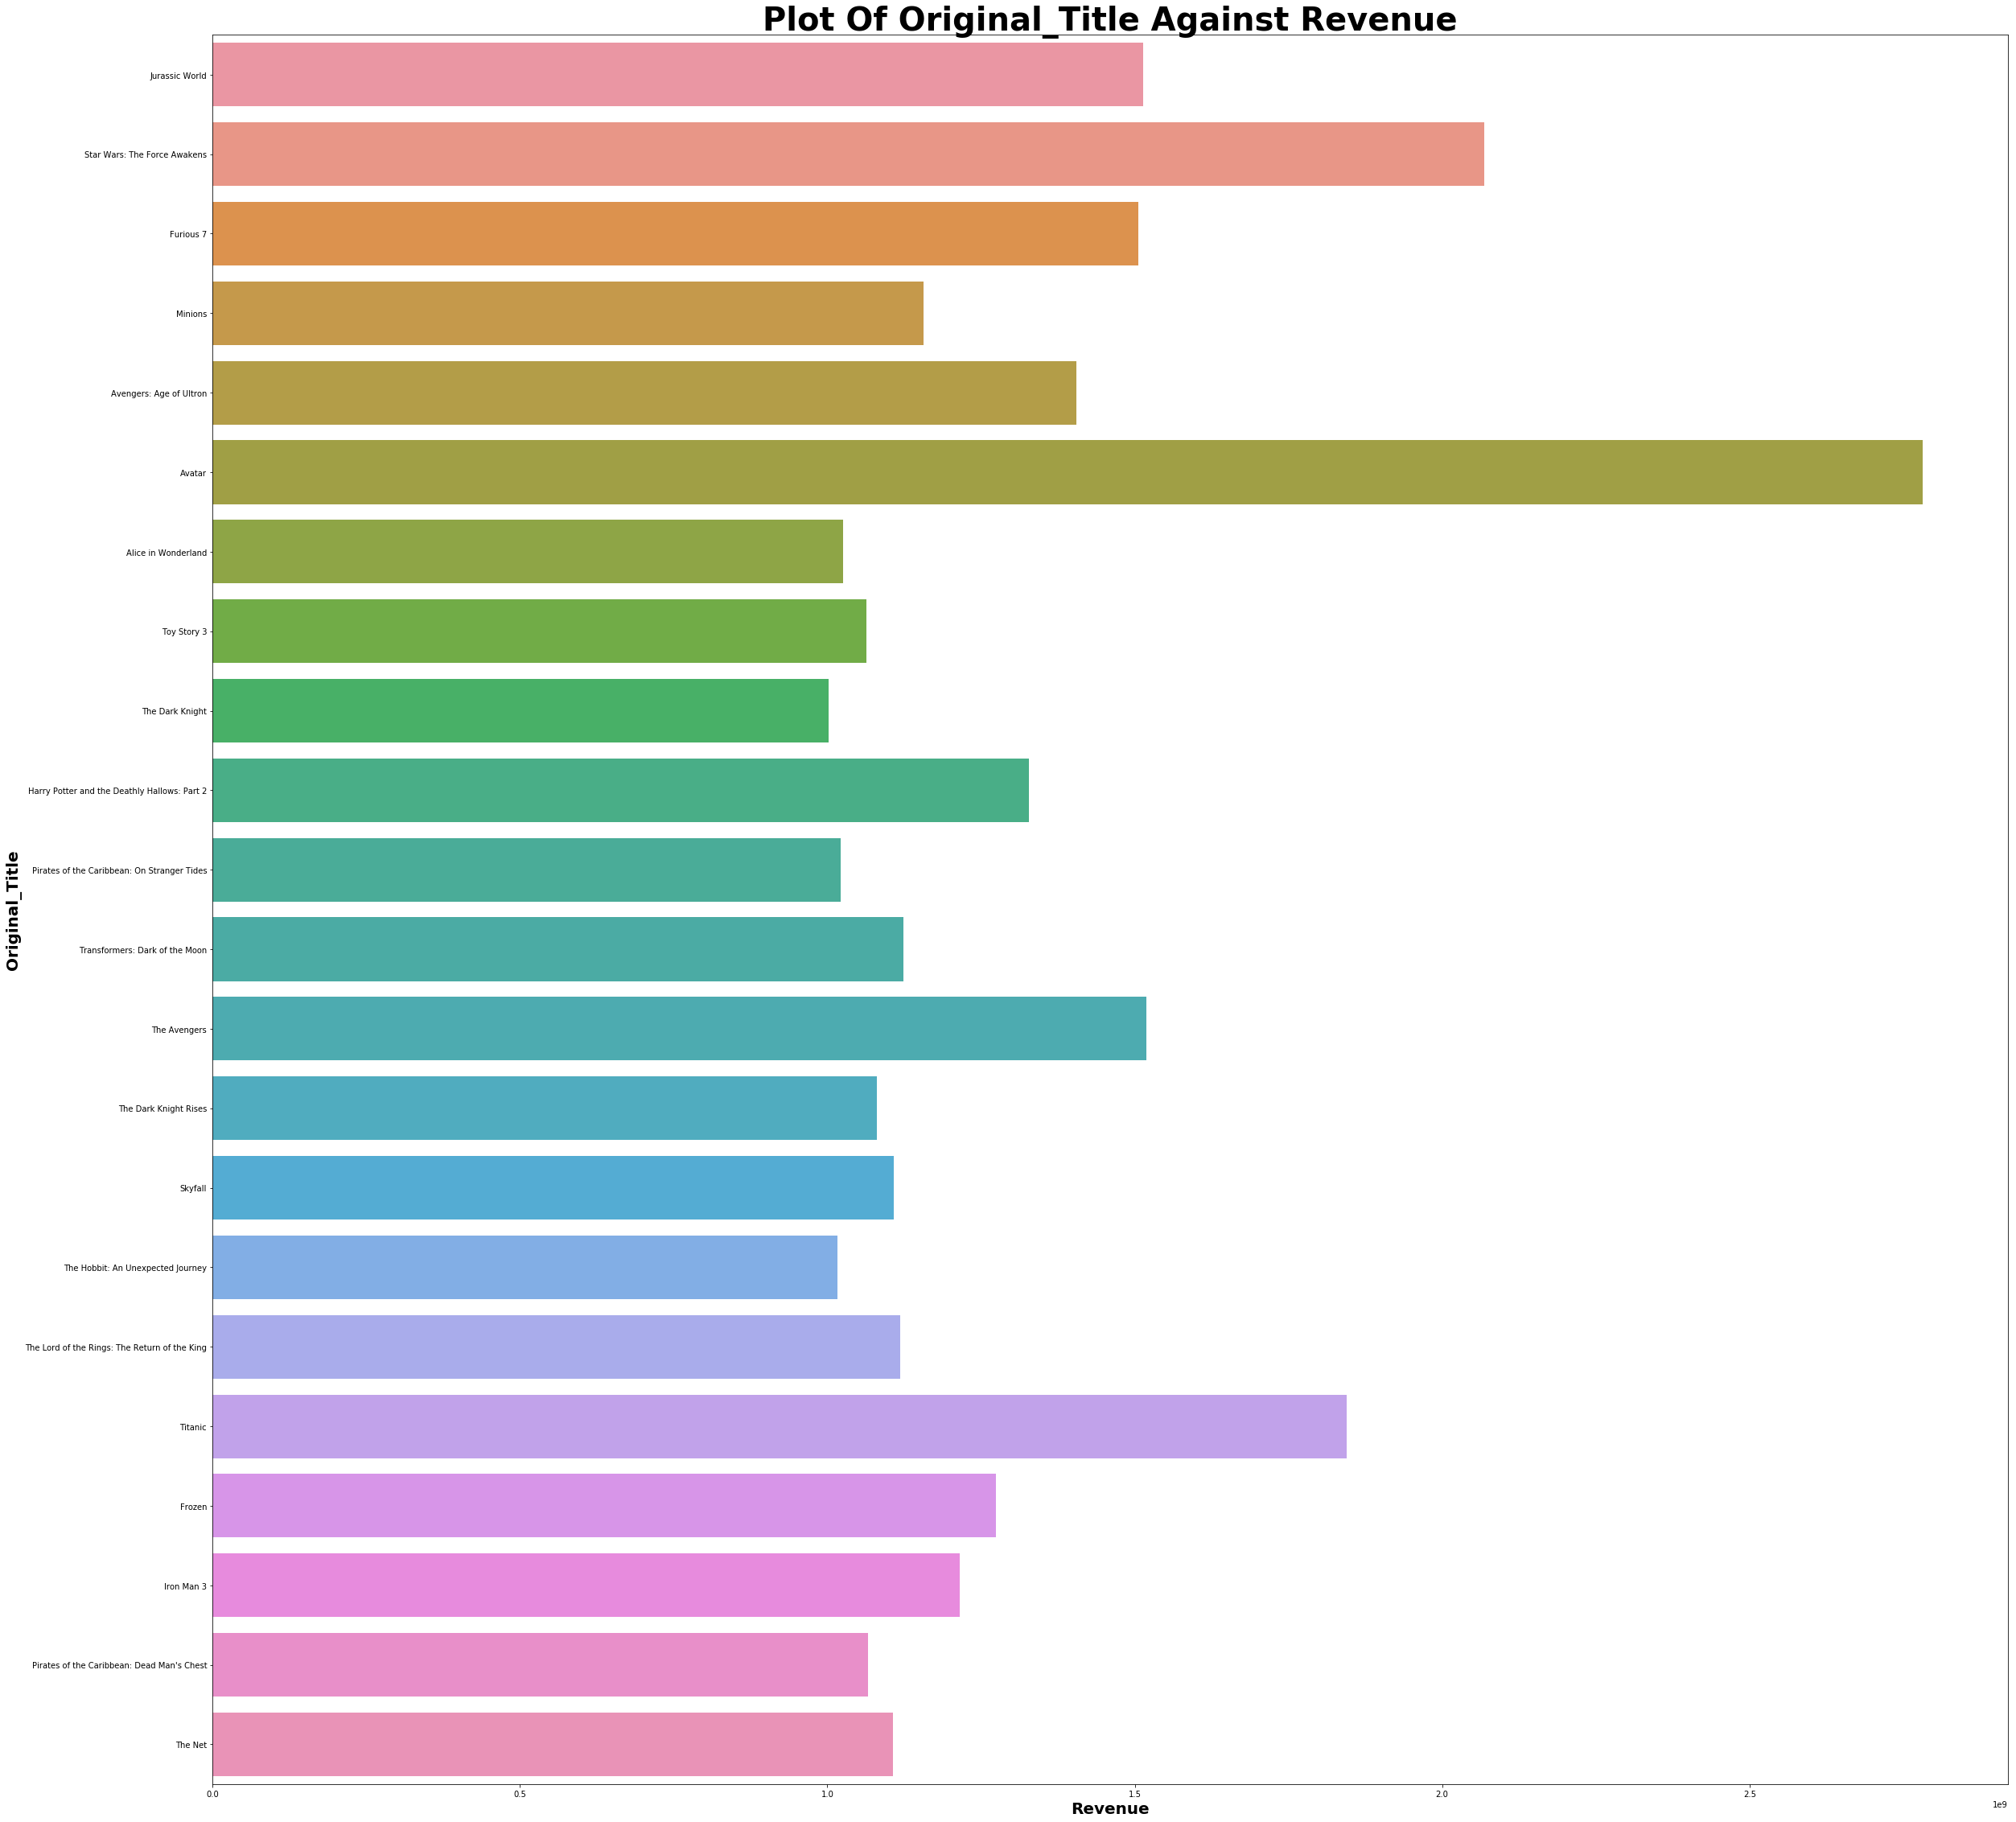

In [82]:
#plotting revenue against original movie title using the barplot function I created
barplot(df_revenue1,'revenue','original_title')


### (I encountered a bit of a problem trying to increase the font of the values on the Revenue axis and the names on the Movie title axis)

In [83]:
df_revenue[['original_title','revenue']].head(1)

,original_title,revenue
1386,Avatar,2781505847


##### Avatar has the highest revenue among all the movies in the dataset .This can be seen on the plot and confirmed from the above code.

In [84]:
df_movies.revenue.mean()

49106971.054884367

##### the average revenue earned over movies is approximately 49million

## Research Question 2  (which genre is the popular over the years?)

In [97]:
# splitting into various genres 
df_movies['genres'].str.split("|")
df_movies.head()

,id,popularity,budget,revenue,original_title,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


##### the table above shows a split of the various genres 

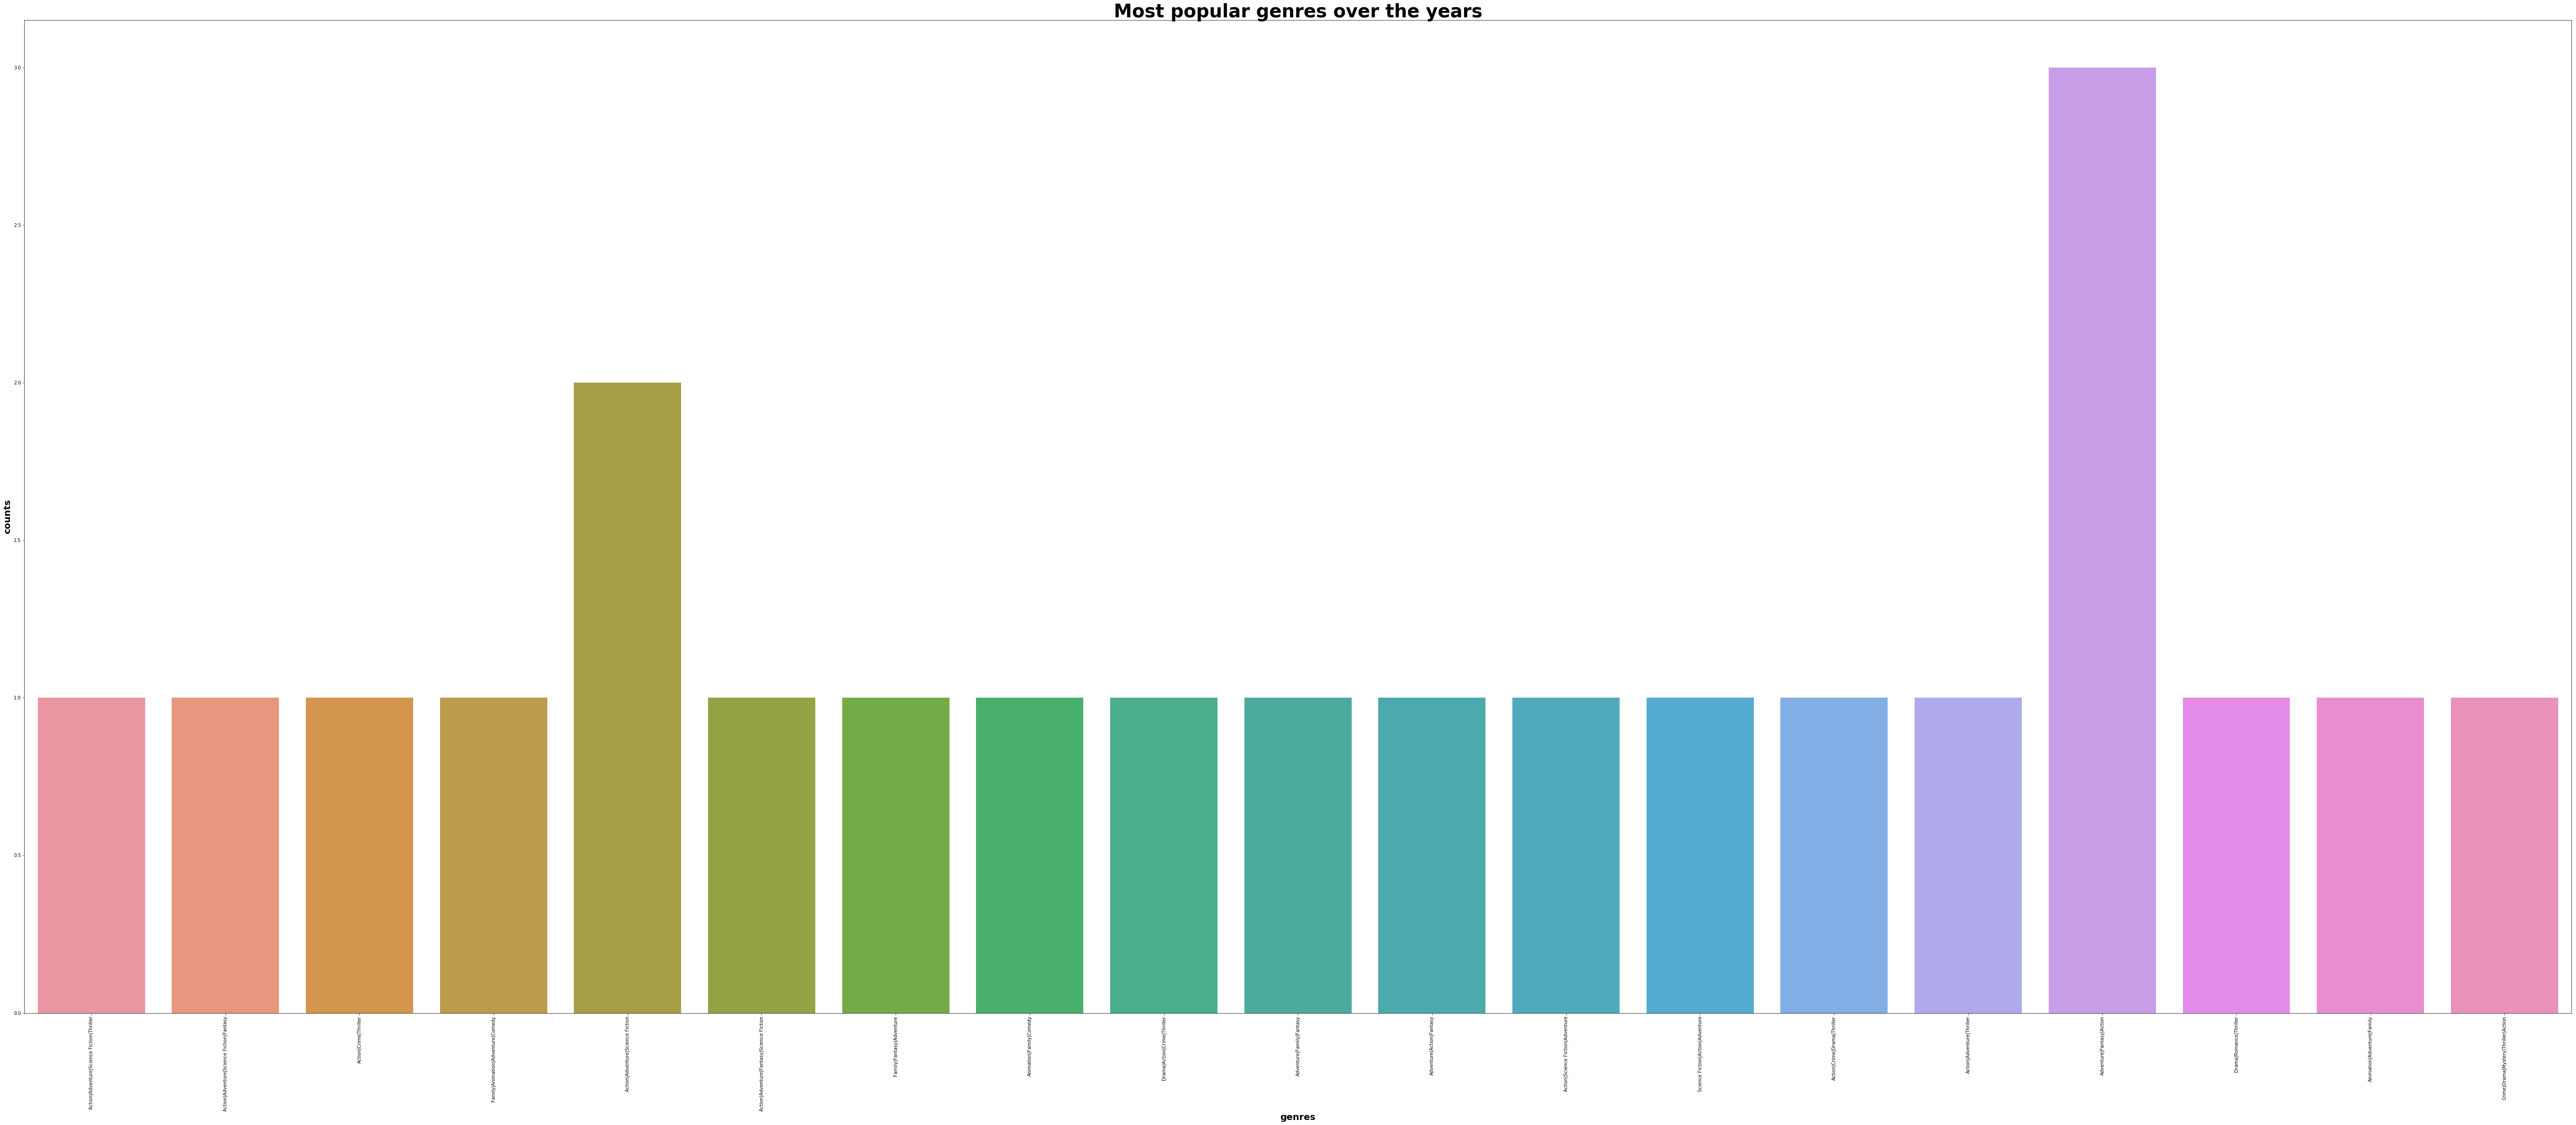

In [100]:
#plotting the number of genres counts againt their respective genre names using normal plot function since my function can't plot index
plt.figure(figsize=(100,40))
sns.countplot(df_revenue1['genres'])
plt.title('Most popular genres over the years',fontsize=40,weight='bold')
plt.xlabel('genres',fontsize=20,weight='bold')
plt.ylabel('counts',fontsize=20,weight='bold')
plt.xticks(rotation=90)
plt.show()

##### From the above visualization it is very clear' Adventure/Fantasy/Action' that is the most popular genre of movie over the years

# Research Question 3(what is the most popular movies over the years?)

In [42]:
df_popularity=df_movies.sort_values(by='popularity',ascending = False)
df2=df_popularity.query('popularity>=10')
df2[['original_title','popularity']].head()

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507


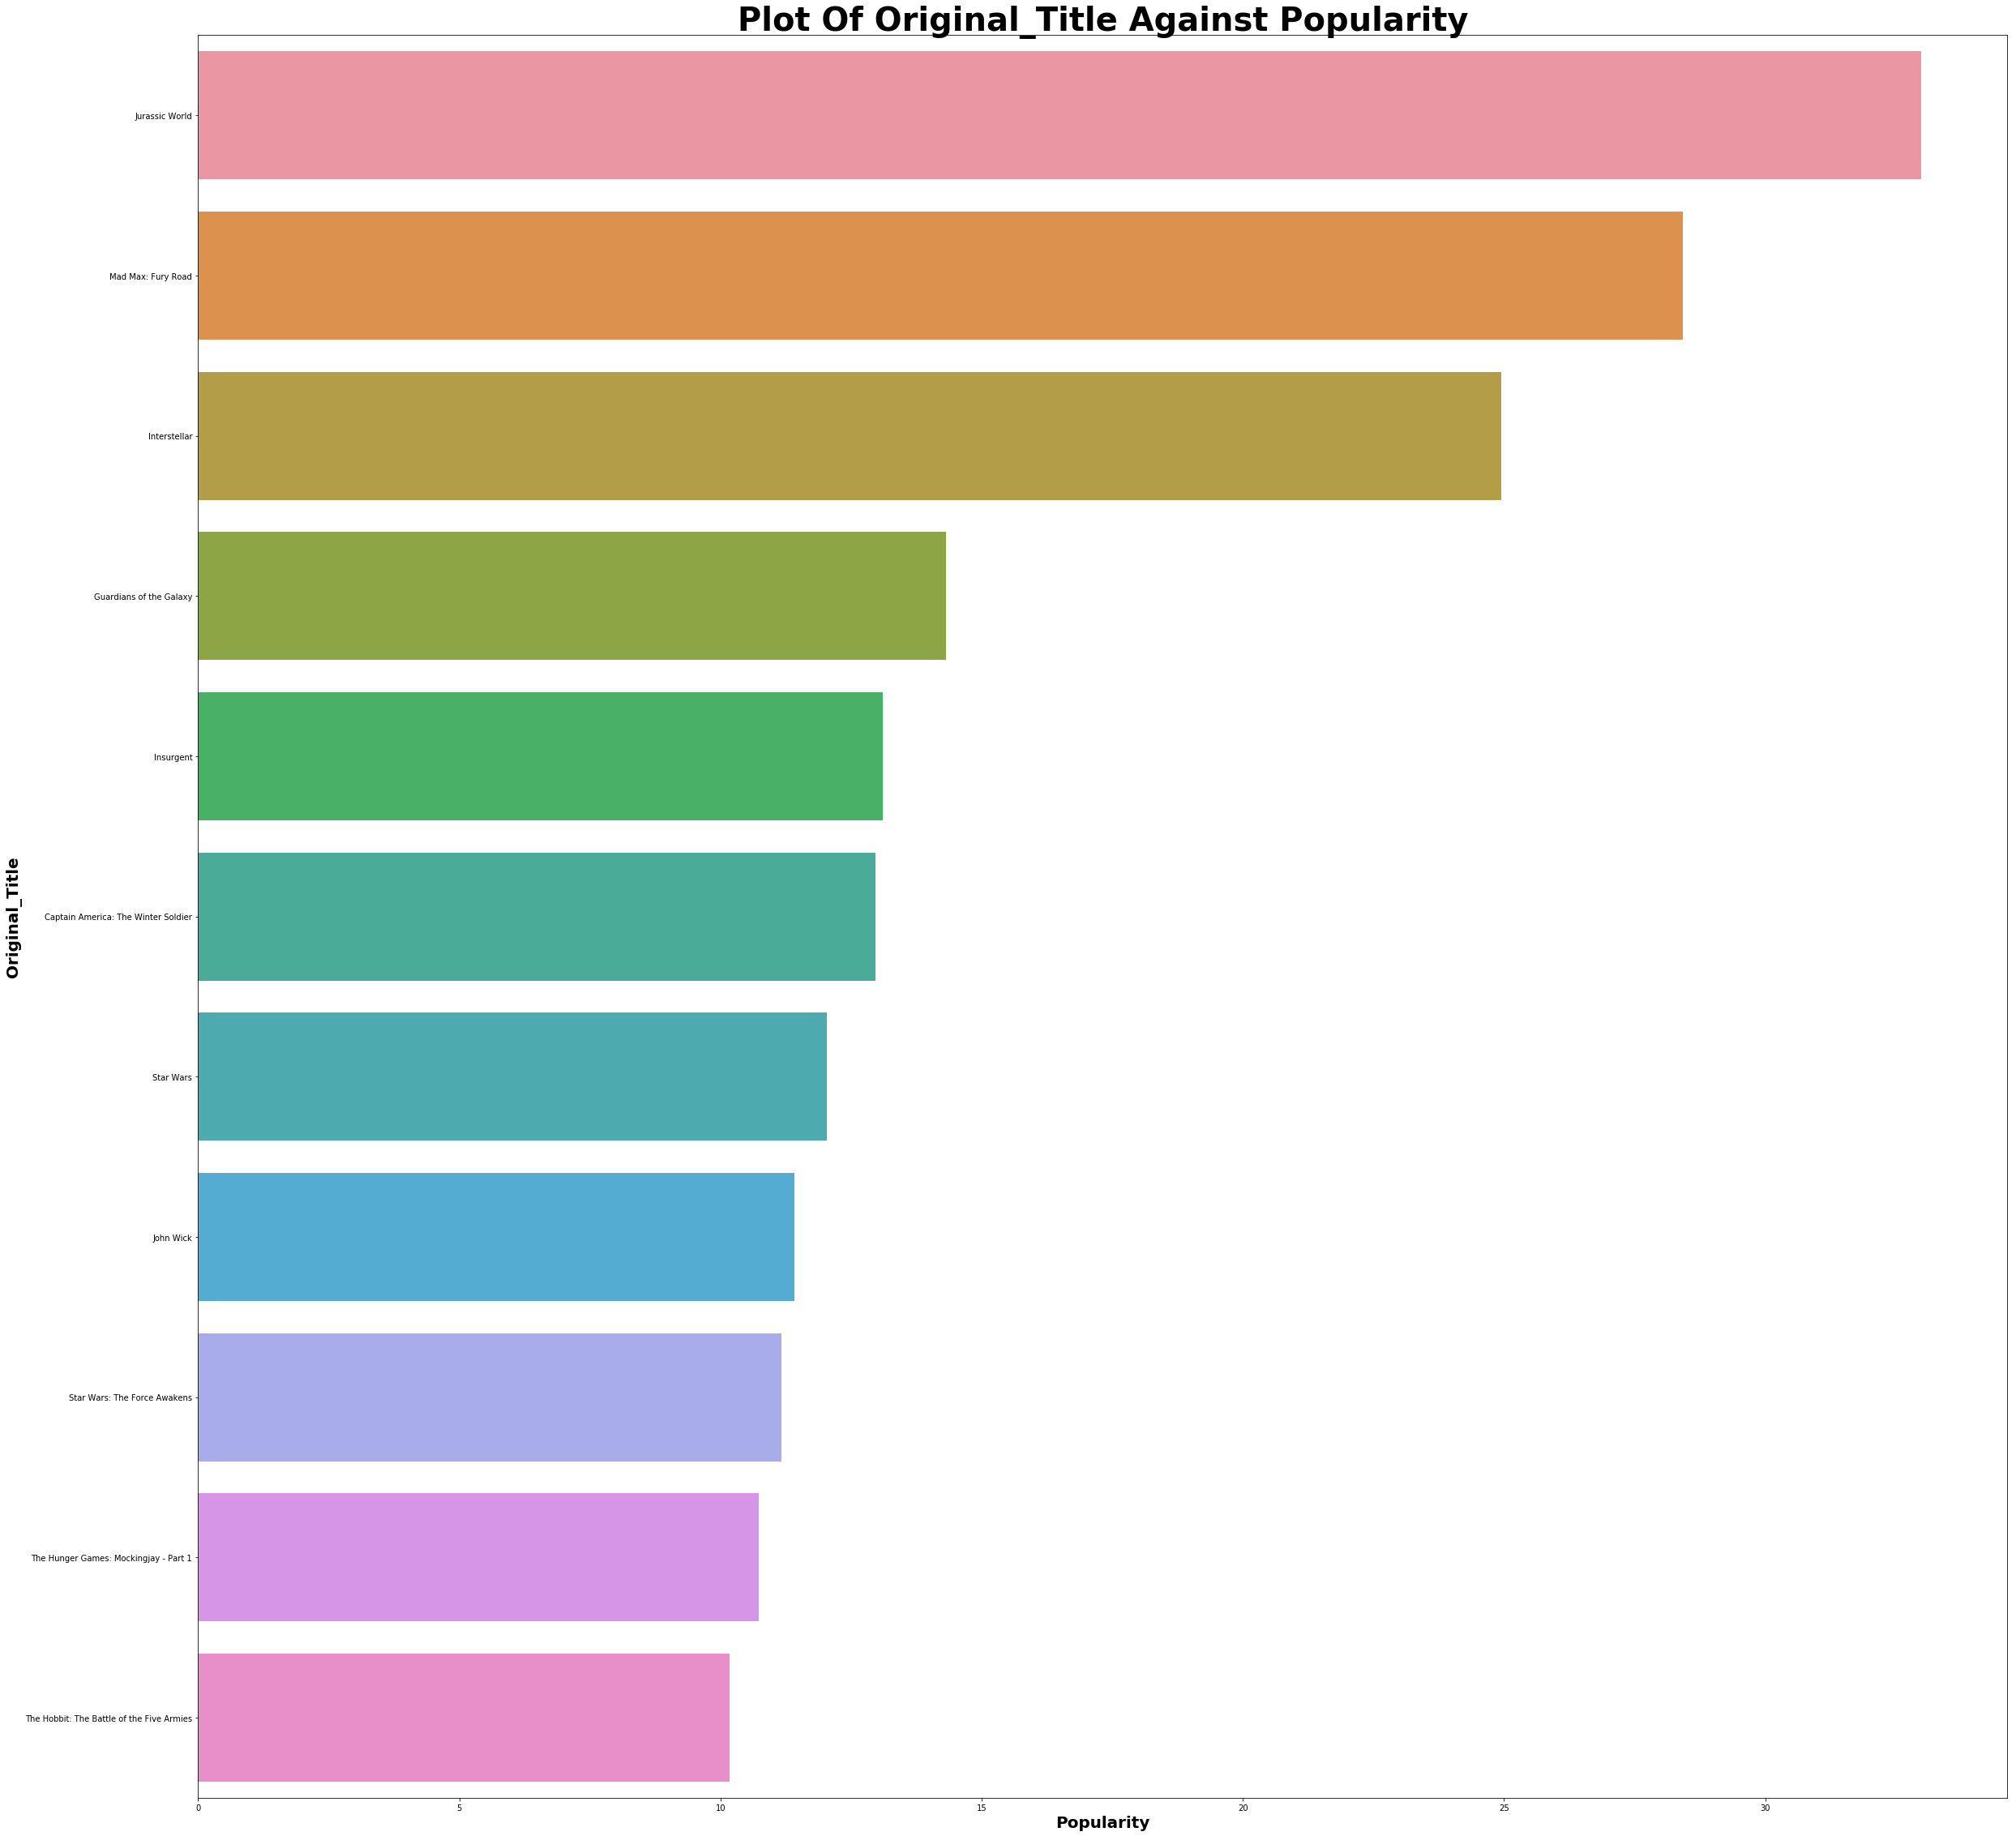

In [43]:
#plotting popularity against the original titles of various movies using the barplot function I creaeted
barplot(df2,'popularity','original_title')

##### From the above visualization, it is very clear Jurassic world holds the highest popularity

# Research Question 4( what is the highest budgetted movies over the years?)

In [44]:
#slicing the dataset to get the budget and the corresponding titles
df_budget=df_movies.loc[:,['budget','original_title','genres']]
df_budget.head()

,budget,original_title,genres
0,150000000,Jurassic World,Action|Adventure|Science Fiction|Thriller
1,150000000,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller
2,110000000,Insurgent,Adventure|Science Fiction|Thriller
3,200000000,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy
4,190000000,Furious 7,Action|Crime|Thriller


In [45]:
#sorting the sliced data
df_sortedbudget=df_budget.sort_values(by='budget',ascending=False)
df_sortedbudget.head()

,budget,original_title,genres
2244,425000000,The Warrior's Way,Adventure|Fantasy|Action|Western|Thriller
3375,380000000,Pirates of the Caribbean: On Stranger Tides,Adventure|Action|Fantasy
7387,300000000,Pirates of the Caribbean: At World's End,Adventure|Fantasy|Action
14,280000000,Avengers: Age of Ultron,Action|Adventure|Science Fiction
6570,270000000,Superman Returns,Adventure|Fantasy|Action|Science Fiction


In [46]:
# creating a query based on a budget of minimum 200million
df_queriedbudget=df_sortedbudget.query('budget>=200000000')
df_queriedbudget.head()

,budget,original_title,genres
2244,425000000,The Warrior's Way,Adventure|Fantasy|Action|Western|Thriller
3375,380000000,Pirates of the Caribbean: On Stranger Tides,Adventure|Action|Fantasy
7387,300000000,Pirates of the Caribbean: At World's End,Adventure|Fantasy|Action
14,280000000,Avengers: Age of Ultron,Action|Adventure|Science Fiction
6570,270000000,Superman Returns,Adventure|Fantasy|Action|Science Fiction


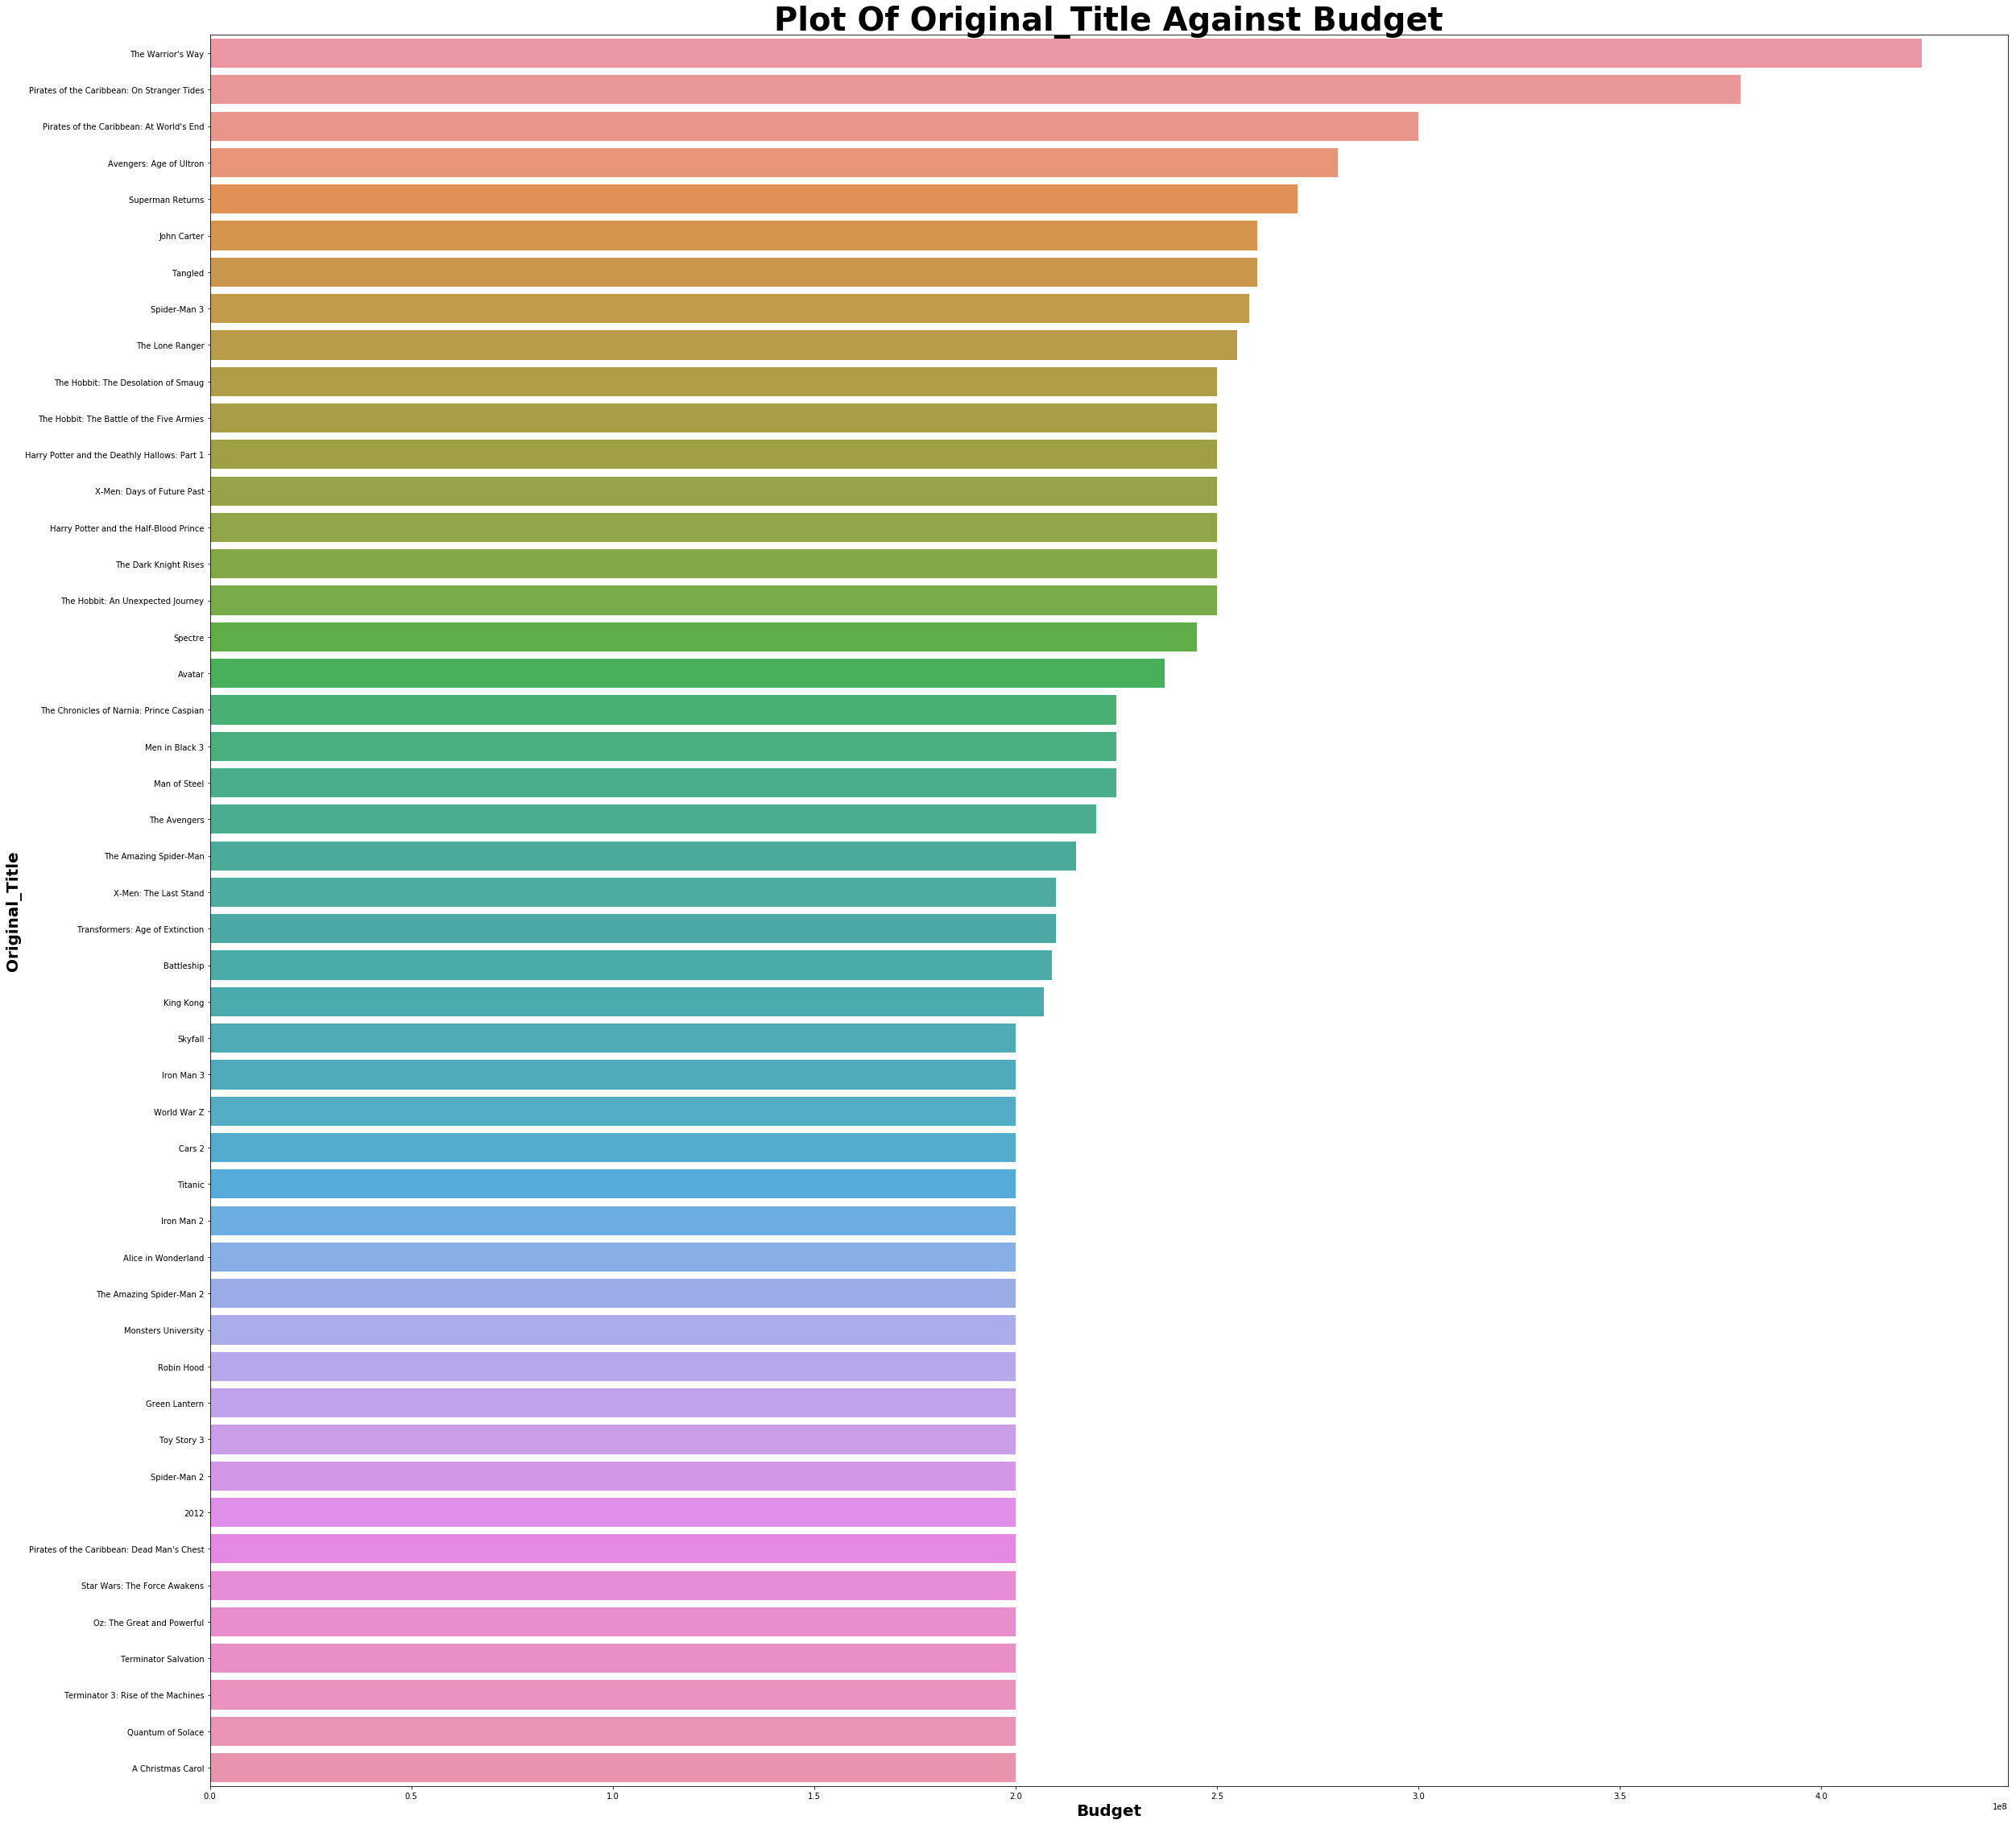

In [47]:
#plotting a barplot of budget against corresponding movie title using the barplot function created early on
barplot(df_queriedbudget,'budget','original_title')  

##### from the display ,the movie with the most expensive budget is 'The warrior's way'

In [27]:
#finding the average spending budget for the movies
df_movies.budget.mean()

17660061.742377173

#####  the average amount needed to budget for a movie is about 35 million dollars. Now let's take a look at the relationship between the budget for a movie and its revenue returns.

Text(0,0.5,'Revenue')

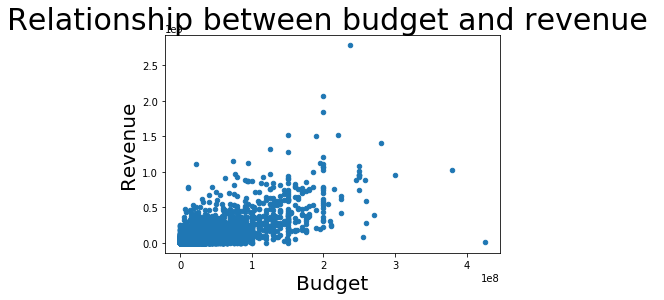

In [28]:
#plotting a scatter plot of budget against revenue
plt.figure(figsize=(15,15));
df_movies.plot(x="budget", y="revenue",kind='scatter')
plt.title('Relationship between budget and revenue ',fontsize=30)
plt.xlabel('Budget',fontsize=20)
plt.ylabel('Revenue',fontsize=20)

##### there is a positive correlation between the revenue returned on movies and the budget for movies.This means as the budget for the movie increases the revenue increases as well.

### Research Question 5(which movie has the longest runtime and does the runtime affect revenue?)

In [29]:
#sorting values from our main dataset in terms of runtime in descending order
df_Longestruntime=df_movies.sort_values(by='runtime',ascending = False)
df_Longestruntime[['original_title','runtime','production_companies']].head(1)

,original_title,runtime,production_companies
2722,Band of Brothers,705,HBO


##### The movie with the longest runtime is the Band of Brothers produced by HBO ,having a runtime of 705 minutes

Text(0,0.5,'Revenue')

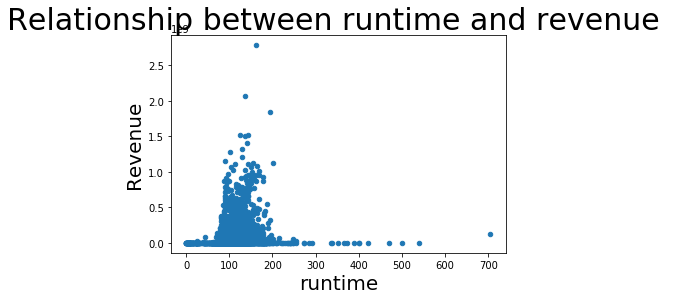

In [30]:
#plotting a scatterplot of runtime and revenue 
plt.figure(figsize=(15,15));
df_movies.plot(x="runtime", y="revenue",kind='scatter')
plt.title('Relationship between runtime and revenue ',fontsize=30)
plt.xlabel('runtime',fontsize=20)
plt.ylabel('Revenue',fontsize=20)

##### The relationship between runtime and revenue is that of a strong non-linear one.What this means is that their relationship is quite unpredictable ,a change in runtime might not necessary affect the revenue of the movie .Hence it is quite difficult to say a longer movie is expected to have a higher revenue or vice versa.

# Conclusion and limitations

In conclusion , the questions the analysis seeked to answer were answered appropriately .Most of which were supported with visualizations to easily figure out the answers.
From my analysis :
##### The highest revenue returning movie is Avatar
##### The most popular genre is drama 
##### The movie with the highest popularity is Jurassic world
##### The movie with the most expensive budget is The warrior's way
##### The movie with the longest runtime is The Band of brothers produced by HBO

###                                      limitations

Eventhough the analysis was well executed and some important insights were found,dropping some of the null values might have affected our results.And since am doing the analysis in 2022,it would have been best the for the exchange rate to be that of 2022,in order to have a clear understanding of the insights in correspondance to current times.



In [58]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0